# Interpreting the relationship between childhood obesity rate change and government funding distribution

This is the python notebook for the multi linear regression in the interpretation of the relationship between childhood obesity prevalence and government funding distribution

Import libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

Read data file

In [5]:
data_all = pd.read_csv('coursework_1_data_2019_manipulate.csv')
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X_rate_change         151 non-null    float64
 1   clean_air             151 non-null    float64
 2   clean_environ         151 non-null    float64
 3   health_training       151 non-null    float64
 4   school_awareness      151 non-null    float64
 5   media_awareness       151 non-null    float64
 6   sub_counselling       151 non-null    float64
 7   region                151 non-null    object 
 8   local_authority_type  151 non-null    object 
dtypes: float64(7), object(2)
memory usage: 10.7+ KB


Transform categorical variables to dummy variables.

In [6]:
data_numeric = pd.get_dummies(data_all)
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   X_rate_change                                 151 non-null    float64
 1   clean_air                                     151 non-null    float64
 2   clean_environ                                 151 non-null    float64
 3   health_training                               151 non-null    float64
 4   school_awareness                              151 non-null    float64
 5   media_awareness                               151 non-null    float64
 6   sub_counselling                               151 non-null    float64
 7   region_East Midlands                          151 non-null    uint8  
 8   region_East of England                        151 non-null    uint8  
 9   region_London                                 151 non-null    uin

VIF test

In [8]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [14]:
data_x = drop_column_using_vif_(data_numeric.drop('X_rate_change', axis=1))
#data_x.head()

D:\software\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\software\ANACONDA\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
D:\software\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\software\ANACONDA\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
D:\software\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\software\ANACONDA\lib\site-packages\statsmodels\stats\outliers_influence.py:193: Runtime

Dropping: clean_environ
Dropping: region_East Midlands
Dropping: region_London
Dropping: local_authority_type_london_borough
Dropping: local_authority_type_metropolitan_borough


Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

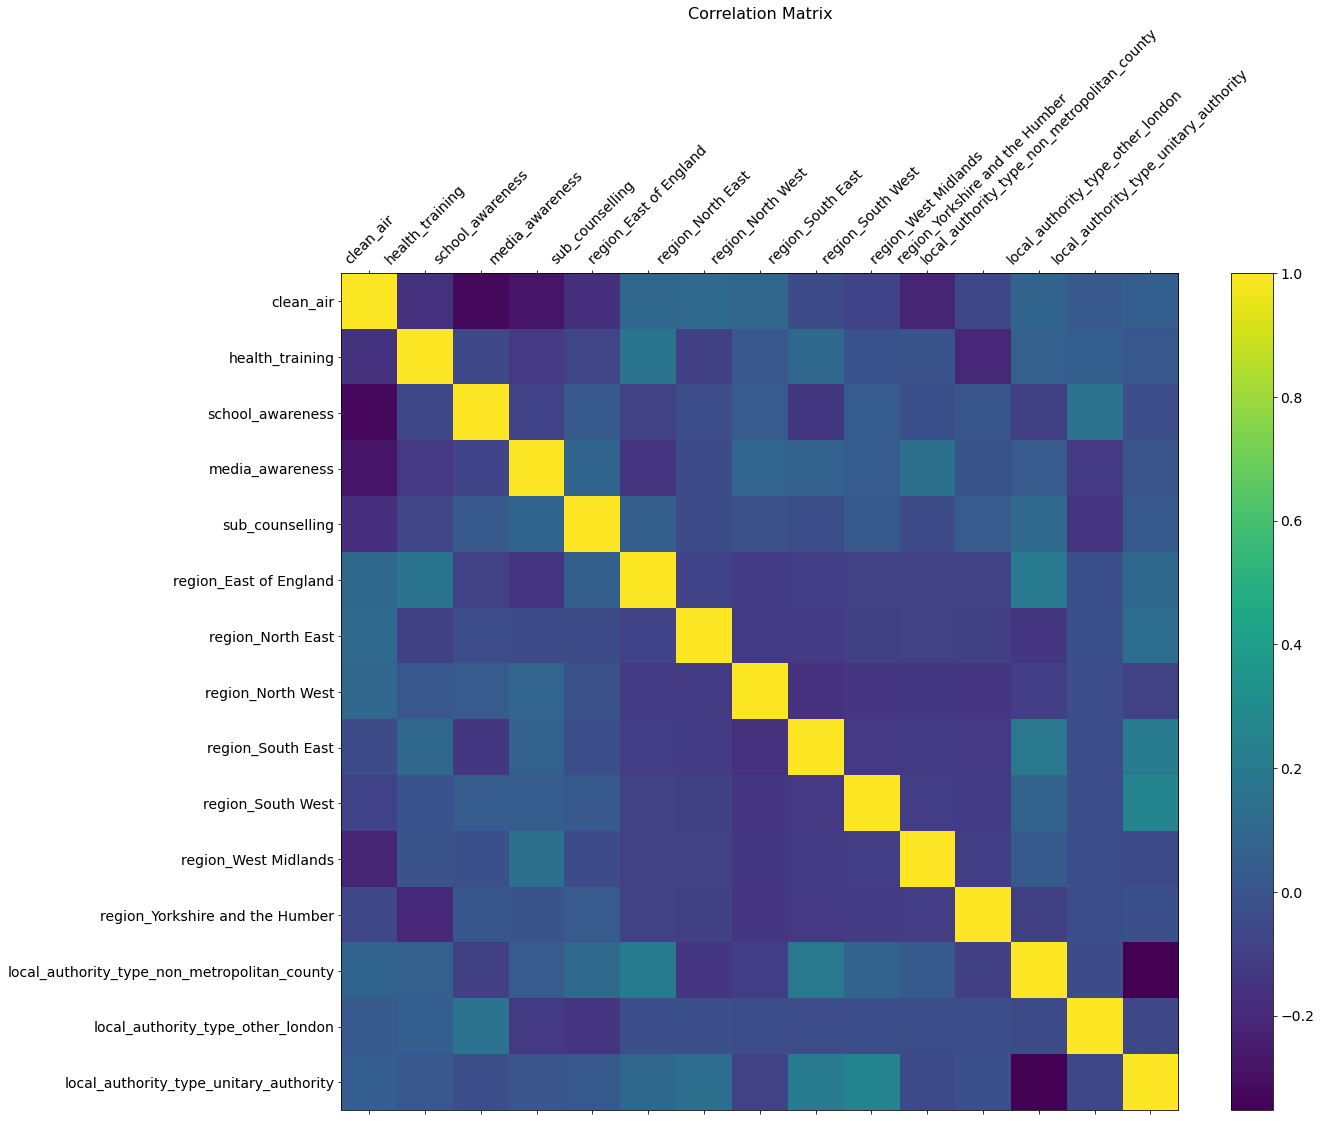

In [13]:
df = data_x
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

The OLS model training

In [15]:
model_data = sm.OLS(endog=data_numeric[['X_rate_change']], exog=sm.add_constant(data_x)).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          X_rate_change   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     20.62
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           6.97e-28
Time:                        21:26:56   Log-Likelihood:                 1135.0
No. Observations:                 151   AIC:                            -2238.
Df Residuals:                     135   BIC:                            -2190.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0006      0.000      6.319      0.000       0.000       0.001
clean_air                                       -0.0003      0.000     -1.968      0.051      -0.001    1.66e-06
health_training                                  0.0001      0.000      0.434      0.665      -0.000       0.001
school_awareness                                -0.0007      0.000     -4.402      0.000      -0.001      -0.000
media_awareness                                  0.0011      0.000      4.654      0.000       0.001       0.002
sub_counselling                                  0.0009      0.000      2.340      0.021       0.000       0.002
region_East of England                          -0.0002   5.37e-05     -3.723      0.000      -0.000   -9.37e-05
region_North East                               -0.0001    4.8e-05     -2.519      0.013      -0.000    -2.6e-05
region_North West                            -6.683e-05    3.7e-05     -1.808      0.073      -0.000    6.26e-06
region_South East                               -0.0002   4.68e-05     -4.433      0.000      -0.000      -0.000
region_South West                               -0.0002   4.92e-05     -4.749      0.000      -0.000      -0.000
region_West Midlands                            -0.0002   4.64e-05     -5.351      0.000      -0.000      -0.000
region_Yorkshire and the Humber                 -0.0001   4.38e-05     -3.373      0.001      -0.000   -6.11e-05
local_authority_type_non_metropolitan_county    -0.0003   3.86e-05     -7.299      0.000      -0.000      -0.000
local_authority_type_other_london               -0.0003      0.000     -1.922      0.057      -0.001    8.11e-06
local_authority_type_unitary_authority          -0.0002   3.24e-05     -6.930      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       12.654   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               27.071
Skew:                          -0.292   Prob(JB):                     1.32e-06
Kurtosis:                       4.990   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Draw scatter plot

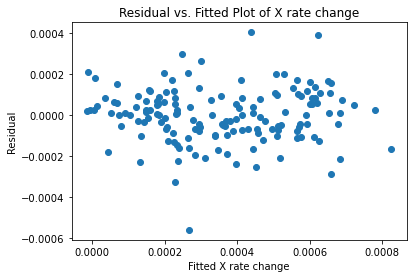

In [16]:
# plot 
plt.scatter(model_data.fittedvalues, model_data.resid)
# adding title and labels
plt.xlabel('Fitted X rate change')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of X rate change')
plt.show()

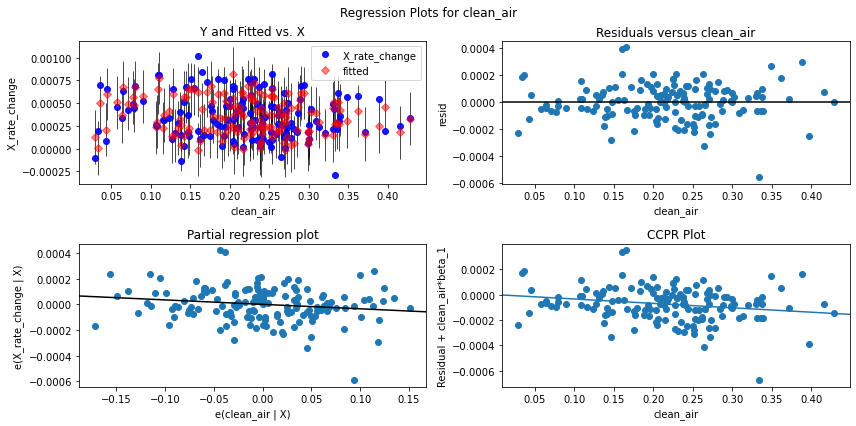

In [18]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_data, 'clean_air', fig=fig)

Refine the model by removing one variable

In [19]:
data_x = data_x.drop('health_training', axis=1)
model_data = sm.OLS(endog=data_numeric[['X_rate_change']], exog=sm.add_constant(data_x)).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          X_rate_change   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     22.21
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.58e-28
Time:                        21:32:17   Log-Likelihood:                 1134.9
No. Observations:                 151   AIC:                            -2240.
Df Residuals:                     136   BIC:                            -2194.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0007   8.43e-05      7.844      0.000       0.000       0.001
clean_air                                       -0.0004      0.000     -2.189      0.030      -0.001   -3.56e-05
school_awareness                                -0.0007      0.000     -4.546      0.000      -0.001      -0.000
media_awareness                                  0.0011      0.000      4.673      0.000       0.001       0.002
sub_counselling                                  0.0008      0.000      2.312      0.022       0.000       0.002
region_East of England                          -0.0002   5.33e-05     -3.709      0.000      -0.000   -9.22e-05
region_North East                               -0.0001   4.77e-05     -2.576      0.011      -0.000   -2.85e-05
region_North West                            -6.632e-05   3.68e-05     -1.801      0.074      -0.000    6.51e-06
region_South East                               -0.0002   4.67e-05     -4.441      0.000      -0.000      -0.000
region_South West                               -0.0002    4.9e-05     -4.794      0.000      -0.000      -0.000
region_West Midlands                            -0.0002   4.61e-05     -5.408      0.000      -0.000      -0.000
region_Yorkshire and the Humber                 -0.0002   4.28e-05     -3.542      0.001      -0.000   -6.69e-05
local_authority_type_non_metropolitan_county    -0.0003   3.84e-05     -7.308      0.000      -0.000      -0.000
local_authority_type_other_london               -0.0003      0.000     -1.910      0.058      -0.001    9.82e-06
local_authority_type_unitary_authority          -0.0002   3.22e-05     -6.938      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       11.662   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               24.048
Skew:                          -0.266   Prob(JB):                     6.00e-06
Kurtosis:                       4.881   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scatter plot of the refined model

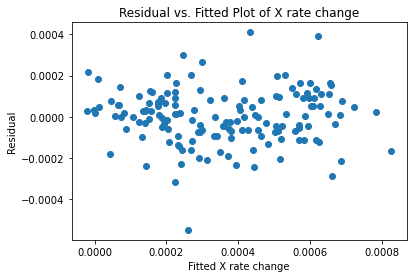

In [20]:
# plot 
plt.scatter(model_data.fittedvalues, model_data.resid)
# adding title and labels
plt.xlabel('Fitted X rate change')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of X rate change')
plt.show()